# 1. Imports

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and cross-validation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


## Import Dataset

In [2]:
df = pd.read_csv("hf://datasets/weeebdev/diabetes/diabetes.csv")

C:\Users\Mahmoud\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Understanding the Data

In [3]:
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [5]:
df.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable                                                              0
dtype: int64

In [6]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handle rows with missing data

- This dataset contains no rows with missing values, but the deletion logic below is in place in case a future dataset

In [7]:
cols = df.select_dtypes(include=["int64", "float64"]).columns

In [8]:
for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.dropna(inplace=True)

In [9]:
df.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable                                                              0
dtype: int64

## Encode

Added a human-readable 'Class label' column for easier interpretation, while keeping the original numeric 'Class variable' for modeling.

In [10]:
# Map numeric target values to human-readable labels
df["Class label"] = df["Class variable"].map({
    0: "Non-Diabetic",
    1: "Diabetic"
})

In [11]:
df.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Class label
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic


## Heat Map Visulaization

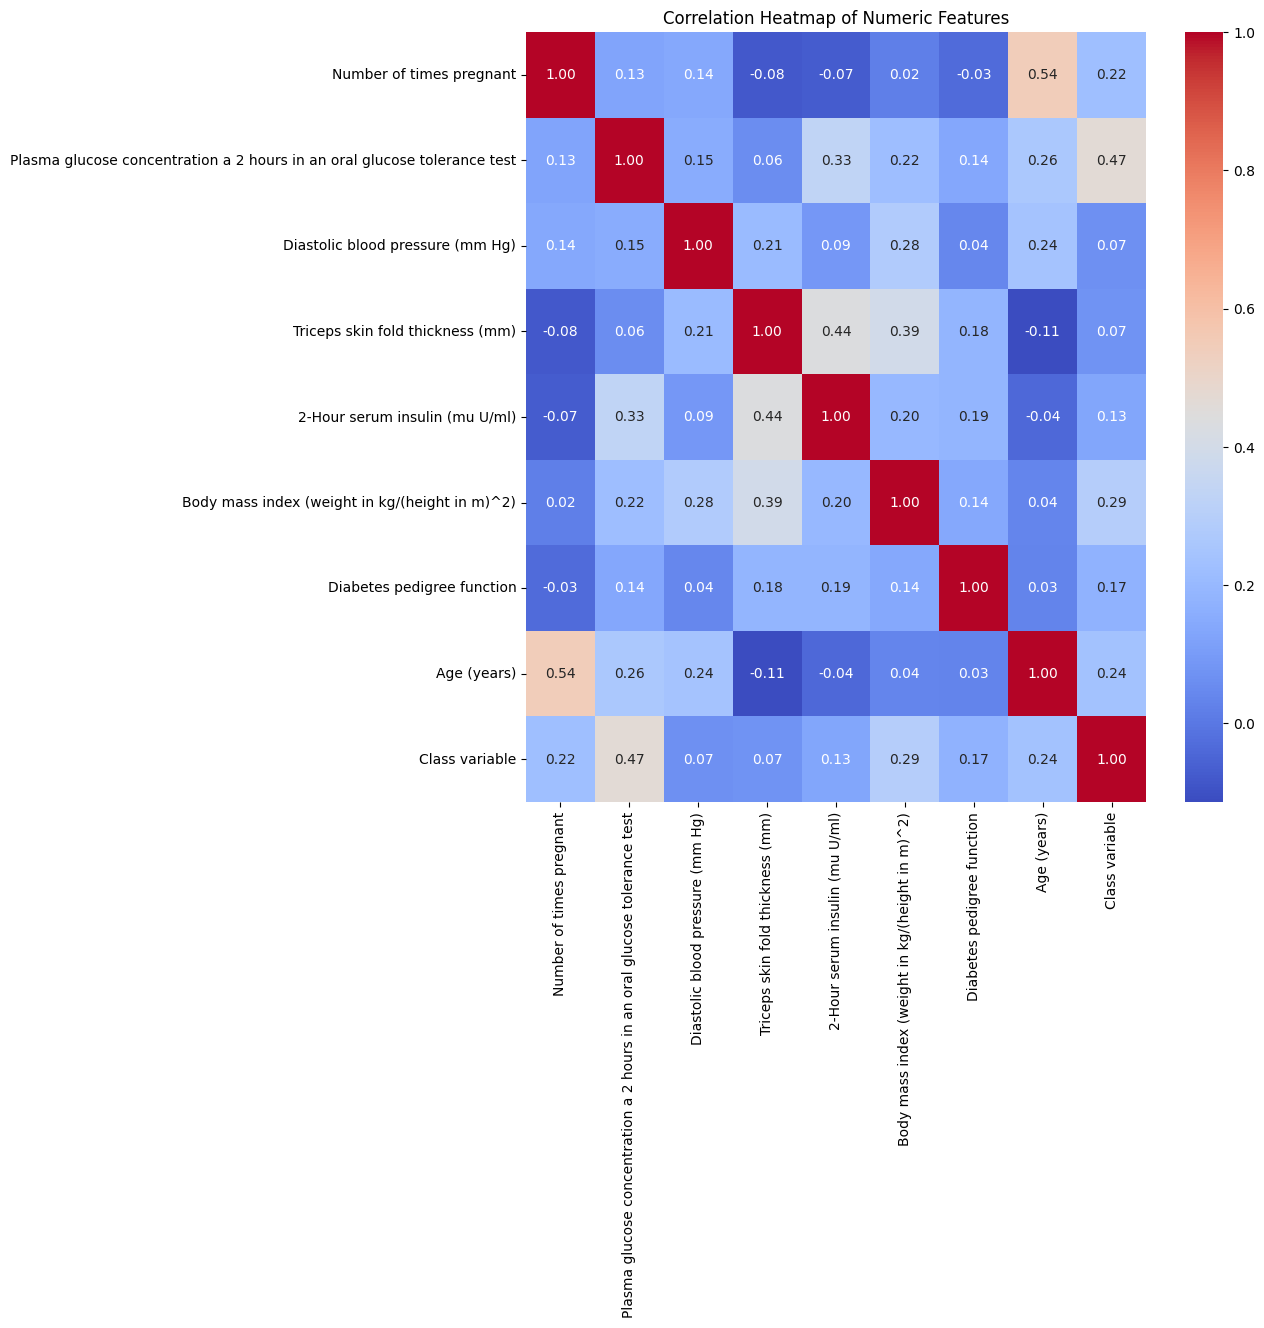

In [12]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 3. Splitting and Normalization

In [13]:
features = df.drop(columns=["Class variable", "Class label"])
numeric_cols = features.select_dtypes(include=["number"]).columns

## Separate features and target

In [14]:
X = df.drop(columns=["Class variable", "Class label"])
y = df["Class variable"]

## Split into train, validation, and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Fit Min-Max scaler on training data only

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

## Apply the same scaler to transform validation and test sets

In [17]:
X_test_scaled = scaler.transform(X_test)

## Training set info

In [18]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  614 non-null    float64
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  614 non-null    float64
 2   Diastolic blood pressure (mm Hg)                                          614 non-null    float64
 3   Triceps skin fold thickness (mm)                                          614 non-null    float64
 4   2-Hour serum insulin (mu U/ml)                                            614 non-null    float64
 5   Body mass index (weight in kg/(height in m)^2)                            614 non-null    float64
 6   Diabetes pedigree function                                         

## Test set info

In [19]:
pd.DataFrame(X_test_scaled, columns=X_test.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  154 non-null    float64
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  154 non-null    float64
 2   Diastolic blood pressure (mm Hg)                                          154 non-null    float64
 3   Triceps skin fold thickness (mm)                                          154 non-null    float64
 4   2-Hour serum insulin (mu U/ml)                                            154 non-null    float64
 5   Body mass index (weight in kg/(height in m)^2)                            154 non-null    float64
 6   Diabetes pedigree function                                         

## Create a Stratified K-Fold object for cross-validation
- n_splits=5: training data will be split into 5 folds
- shuffle=True: shuffle the data before splitting

In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Perform 5-fold cross-validation on the training set
- In each fold, part of the training data is used for training and the remaining part for validation
- This helps evaluate model performance more robustly
- X_fold_train, y_fold_train: training subset for current fold
- X_fold_val, y_fold_val: validation subset for current fold
- Print shapes to verify the split

In [21]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    print(f"Fold {fold}:")
    print(f"  Train shape: {X_fold_train.shape}, Validation shape: {X_fold_val.shape}")

Fold 1:
  Train shape: (491, 8), Validation shape: (123, 8)
Fold 2:
  Train shape: (491, 8), Validation shape: (123, 8)
Fold 3:
  Train shape: (491, 8), Validation shape: (123, 8)
Fold 4:
  Train shape: (491, 8), Validation shape: (123, 8)
Fold 5:
  Train shape: (492, 8), Validation shape: (122, 8)


# 4. Model Training

## Define models to train

In [22]:
models = {
    "SVM_linear": SVC(kernel='linear', random_state=42),
    "SVM_poly": SVC(kernel='poly', random_state=42),
    "SVM_rbf": SVC(kernel='rbf', random_state=42),
    "SVM_sigmoid": SVC(kernel='sigmoid', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42, verbosity=0)
}

### Parameters to be tuned for each model

In [23]:
param_grids = {
    "SVM_linear": {'C': [0.1, 1, 10]},
    "SVM_poly": {'C': [0.1, 1, 10], 'degree': [2, 3, 4]},
    "SVM_rbf": {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1]},
    "SVM_sigmoid": {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1]},
    "Decision Tree": {'max_depth': [3, 5, None], 'min_samples_split': [2, 5]},
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [None, 5]},
    "k-NN": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    "Logistic Regression": {'C': [0.1, 1, 10], 'penalty': ['l2']},
    "XGBoost": {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
}

###  Storage for best estimators and grid search objects

In [24]:
best_models = {}
grid_searches = {}
cv_summary = {}

### Run the model

In [25]:
for name, model in models.items():
    print(f"Tuning / fitting {name}...")
    if name in param_grids:
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='accuracy',
            cv=skf,
            n_jobs=-1,
            refit=True
        )
        grid.fit(X_train_scaled, y_train)               
        best_models[name] = grid.best_estimator_         # best estimator refit on full train
        grid_searches[name] = grid
        cv_summary[name] = {
            'best_cv_score': grid.best_score_,
            'best_params': grid.best_params_
        }
        print(f"  Best CV score: {grid.best_score_:.4f}, Best params: {grid.best_params_}")
    else:
        # no hyperparameter grid: just fit on entire training data
        model.fit(X_train_scaled, y_train)
        best_models[name] = model
        cv_summary[name] = {'best_cv_score': None, 'best_params': None}
        print("  No hyperparameter grid: fitted default model on full training set.")

Tuning / fitting SVM_linear...
  Best CV score: 0.7850, Best params: {'C': 10}
Tuning / fitting SVM_poly...
  Best CV score: 0.7883, Best params: {'C': 1, 'degree': 2}
Tuning / fitting SVM_rbf...
  Best CV score: 0.7834, Best params: {'C': 10, 'gamma': 0.1}
Tuning / fitting SVM_sigmoid...
  Best CV score: 0.7817, Best params: {'C': 10, 'gamma': 0.1}
Tuning / fitting Decision Tree...
  Best CV score: 0.7525, Best params: {'max_depth': 3, 'min_samples_split': 2}
Tuning / fitting Random Forest...
  Best CV score: 0.7720, Best params: {'max_depth': None, 'n_estimators': 200}
Tuning / fitting k-NN...
  Best CV score: 0.7574, Best params: {'n_neighbors': 7, 'weights': 'distance'}
Tuning / fitting Logistic Regression...
  Best CV score: 0.7834, Best params: {'C': 10, 'penalty': 'l2'}
Tuning / fitting XGBoost...
  Best CV score: 0.7622, Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [26]:
cv_results_tuned_df = pd.DataFrame.from_dict(cv_summary, orient='index')
cv_results_tuned_df = cv_results_tuned_df.reset_index().rename(columns={'index': 'Model'})
display(cv_results_tuned_df)

,Model,best_cv_score,best_params
0,SVM_linear,0.784979,{'C': 10}
1,SVM_poly,0.788285,"{'C': 1, 'degree': 2}"
2,SVM_rbf,0.783367,"{'C': 10, 'gamma': 0.1}"
3,SVM_sigmoid,0.781714,"{'C': 10, 'gamma': 0.1}"
4,Decision Tree,0.752472,"{'max_depth': 3, 'min_samples_split': 2}"
5,Random Forest,0.771998,"{'max_depth': None, 'n_estimators': 200}"
6,k-NN,0.757364,"{'n_neighbors': 7, 'weights': 'distance'}"
7,Logistic Regression,0.783367,"{'C': 10, 'penalty': 'l2'}"
8,XGBoost,0.762228,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."


# 5. Apply models after being tuned on the test dataset

In [27]:
test_results = []
for name, model in best_models.items():
    y_test_pred = model.predict(X_test_scaled)
    test_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, zero_division=0),
        'Recall': recall_score(y_test, y_test_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_test_pred, zero_division=0)
    })

### Comnments on final summary table

- Highest accuracy: SVM_poly (accuracy = 0.753).
- Highest precision: SVM_poly (precision = 0.700) — it makes the fewest false-positive predictions.
- Highest recall: Random Forest (recall = 0.593) — it detects the largest share of actual diabetic cases.
- Highest F1-score: Random Forest (F1 = 0.621) — it gives the best balance between precision and recall.

- SVM_poly gives the best overall accuracy and precision (fewer false alarms), while Random Forest is better at finding diabetics (higher recall and best F1), which is usually more important in a medical screening task.

- For this diabetic vs non-diabetic classification, use Random Forest as the primary model (best F1 and highest recall), and consider SVM_poly as a secondary model if you want to prioritize minimizing false positives.

In [28]:
test_results_df = pd.DataFrame(test_results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
display(test_results_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,SVM_poly,0.753247,0.700000,0.518519,0.595745
1,Random Forest,0.746753,0.653061,0.592593,0.621359
2,XGBoost,0.746753,0.666667,0.555556,0.606061
3,SVM_rbf,0.740260,0.675000,0.500000,0.574468
4,SVM_sigmoid,0.733766,0.675676,0.462963,0.549451
5,SVM_linear,0.707792,0.600000,0.500000,0.545455
6,Logistic Regression,0.707792,0.600000,0.500000,0.545455
7,Decision Tree,0.694805,0.666667,0.259259,0.373333
8,k-NN,0.694805,0.568627,0.537037,0.552381
